In [1]:
# import yfinance as yf

# # Read data
# Df = yf.download('RELIANCE.NS', auto_adjust=True)

In [2]:
import pandas as pd
df=pd.read_csv("RELIANCE.NS.modified.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,pct_change,hist vol
0,5/10/2023,2298.269287,2307.360840,2290.146729,2304.361084,2296.249756,5436127,NaN,NaN
1,5/11/2023,2306.530029,2316.267578,2285.854736,2289.316162,2281.257813,5278930,-0.006529,0.009435243
2,5/12/2023,2279.624512,2295.869385,2267.348633,2293.054199,2284.982666,3477670,0.001633,0.009306484
3,5/15/2023,2298.177002,2311.698730,2282.716553,2297.576904,2289.489502,3416671,0.001972,0.00945005
4,5/16/2023,2301.961182,2307.129883,2261.487549,2264.856689,2256.884277,4358614,-0.014241,0.009441199
...,...,...,...,...,...,...,...,...,...
242,5/6/2024,2871.000000,2880.000000,2836.000000,2839.050049,2839.050049,3697104,-0.010094,0.01150412
243,5/7/2024,2831.949951,2841.500000,2784.000000,2802.949951,2802.949951,7258736,-0.012716,0.013031631
244,5/8/2024,2795.000000,2865.899902,2795.000000,2837.100098,2837.100098,4719501,0.012184,0.014701253
245,5/9/2024,2826.000000,2847.500000,2780.000000,2788.250000,2788.250000,5504806,-0.017218,0.010285866


In [4]:
df.replace('#DIV/0!', float('nan'), inplace=True)


In [5]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
pct_change    1
hist vol      2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
pct_change    0
hist vol      0
dtype: int64

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,pct_change
count,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000
mean,2565.941501,2586.590712,2545.866301,2565.721561,2563.299021,6.313372e+06,0.000860
std,245.472542,250.714088,240.818745,245.707900,247.229933,3.149154e+06,0.011693
min,2240.000000,2257.611084,2220.300049,2226.500000,2226.500000,1.927405e+06,-0.030956
25%,2350.326416,2361.949951,2336.399902,2349.399902,2347.065918,4.305297e+06,-0.006529
50%,2495.600098,2528.399902,2471.600098,2502.699951,2495.600098,5.551370e+06,0.000632
75%,2851.899902,2880.000000,2825.800049,2850.500000,2850.500000,7.296346e+06,0.007327
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,2.854094e+07,0.070192


In [9]:

# Convert to DateTime
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Set date as index
df.set_index('Date', inplace=True)


<Axes: xlabel='Date'>

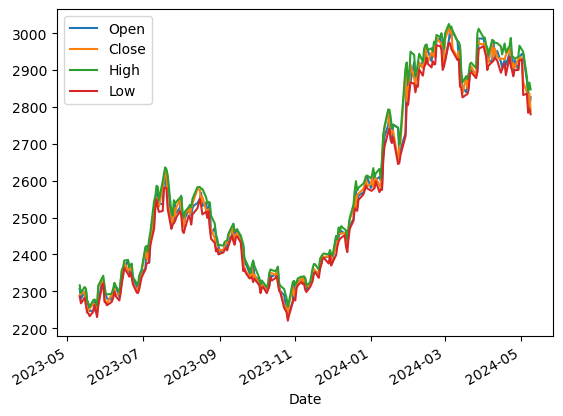

In [11]:

# Plot time series
df[['Open', 'Close', 'High', 'Low']].plot()

<Axes: xlabel='Date'>

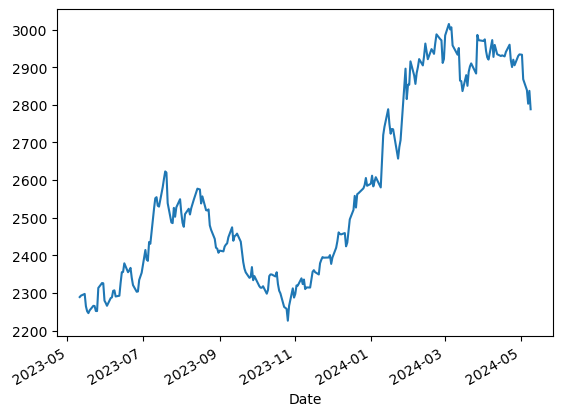

In [12]:
# Identify trends daily basis
df['Close'].rolling(window=1).mean().plot() 

<Axes: xlabel='Date'>

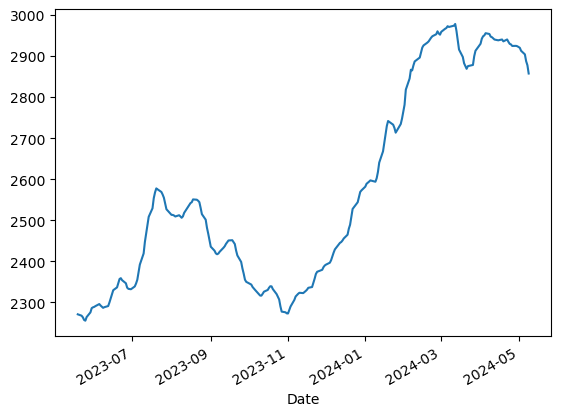

In [13]:
# Identify trends weekly basis
df['Close'].rolling(window=7).mean().plot() # 7-day moving average

<Axes: xlabel='Date'>

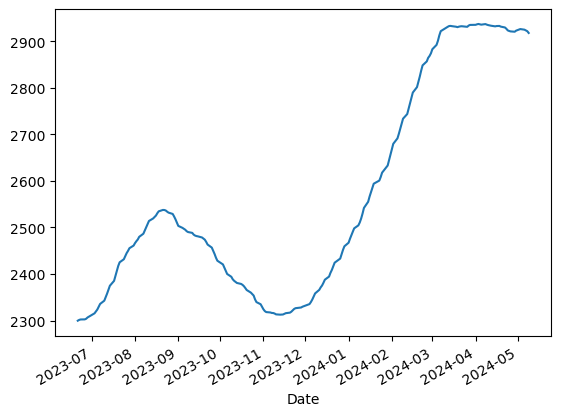

In [14]:

# Identify trends monthly basis
df['Close'].rolling(window=30).mean().plot()

### Calculating RSI and MACD and plotting their charts alongside the daily stock action

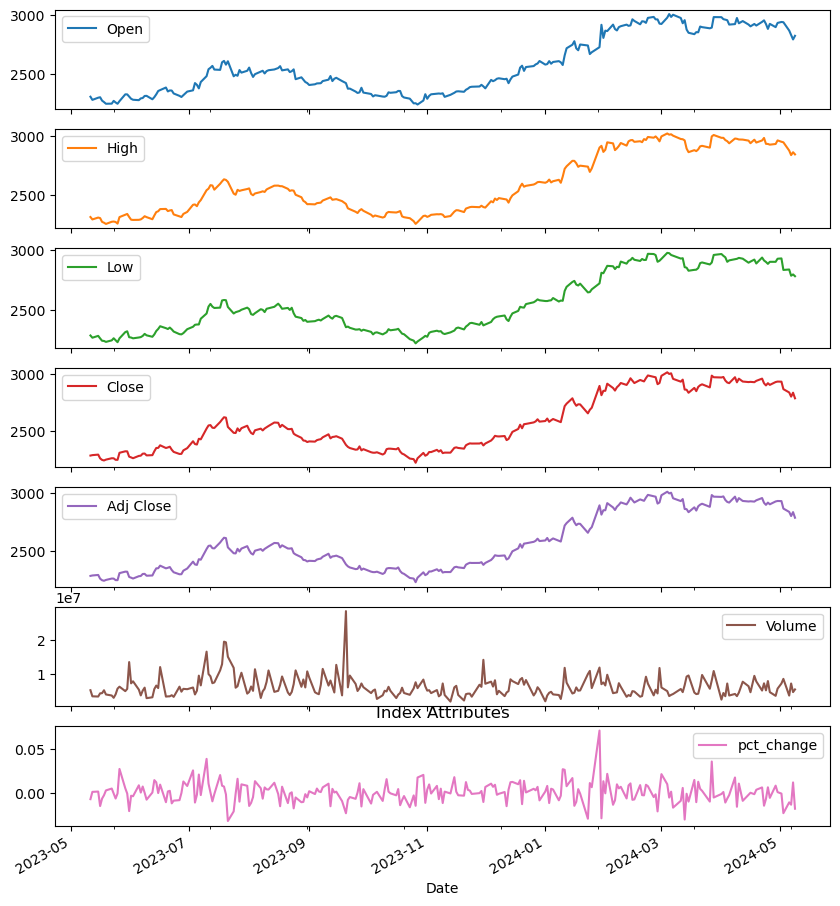

In [15]:
import matplotlib.pyplot as plt
df.plot(subplots = True, figsize = (10,12))
plt.title('Index Attributes')
plt.show()

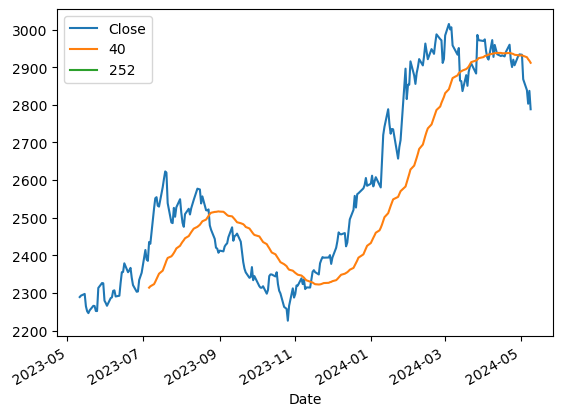

In [16]:
#Isolate the adjusted closing prices 
adj_close_px = df['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]


# Short moving window rolling mean
df['40'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df[['Close', '40', '252']].plot()

plt.show()

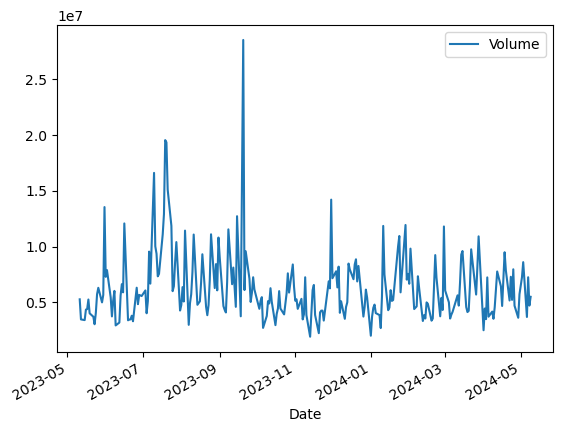

In [17]:

# Relationship between volume and price
df.plot(y='Volume', use_index=True)

# High volume days
high_volume_days = df[df['Volume'] > df['Volume'].quantile(0.95)]

<Axes: >

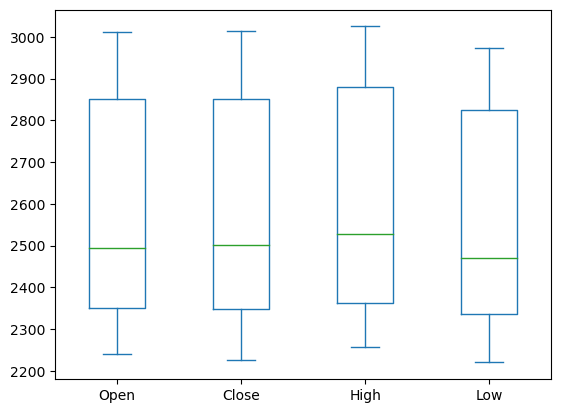

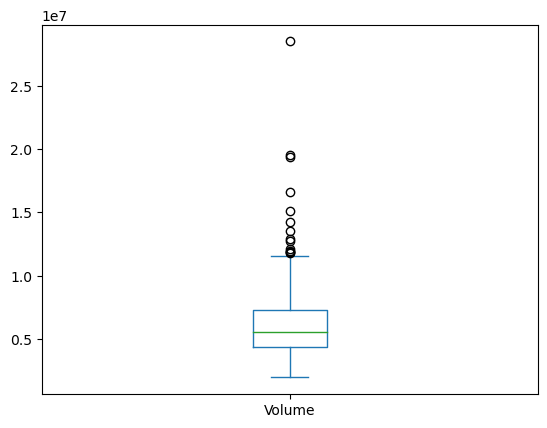

In [18]:

df['daily_return'] = df['Close'].pct_change() * 100
# Box plot
df[['Open', 'Close', 'High', 'Low']].plot(kind='box')

df[['Volume']].plot(kind='box')

In this plot, all four distributions have a similar range of values, with the medians slightly closer to the bottom of the boxes, which might suggest a slight skew towards lower values. The "High" prices have the largest range, indicating that the highest prices varied more than the opening, closing, or lowest prices.



Text(0.5, 1.0, 'Stock Prices Over Time')

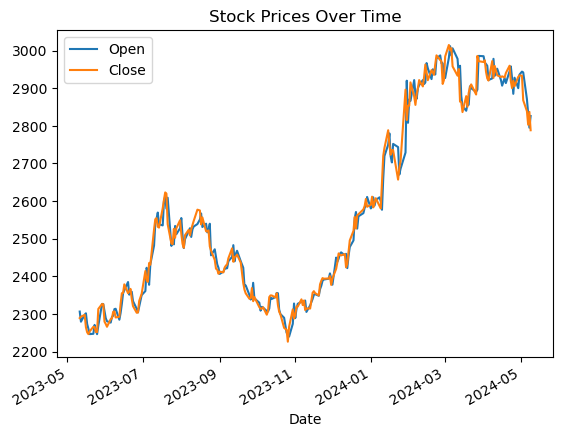

In [19]:
# Time series plot
df[['Open', 'Close']].plot()
plt.title('Stock Prices Over Time')

<Axes: xlabel='Date'>

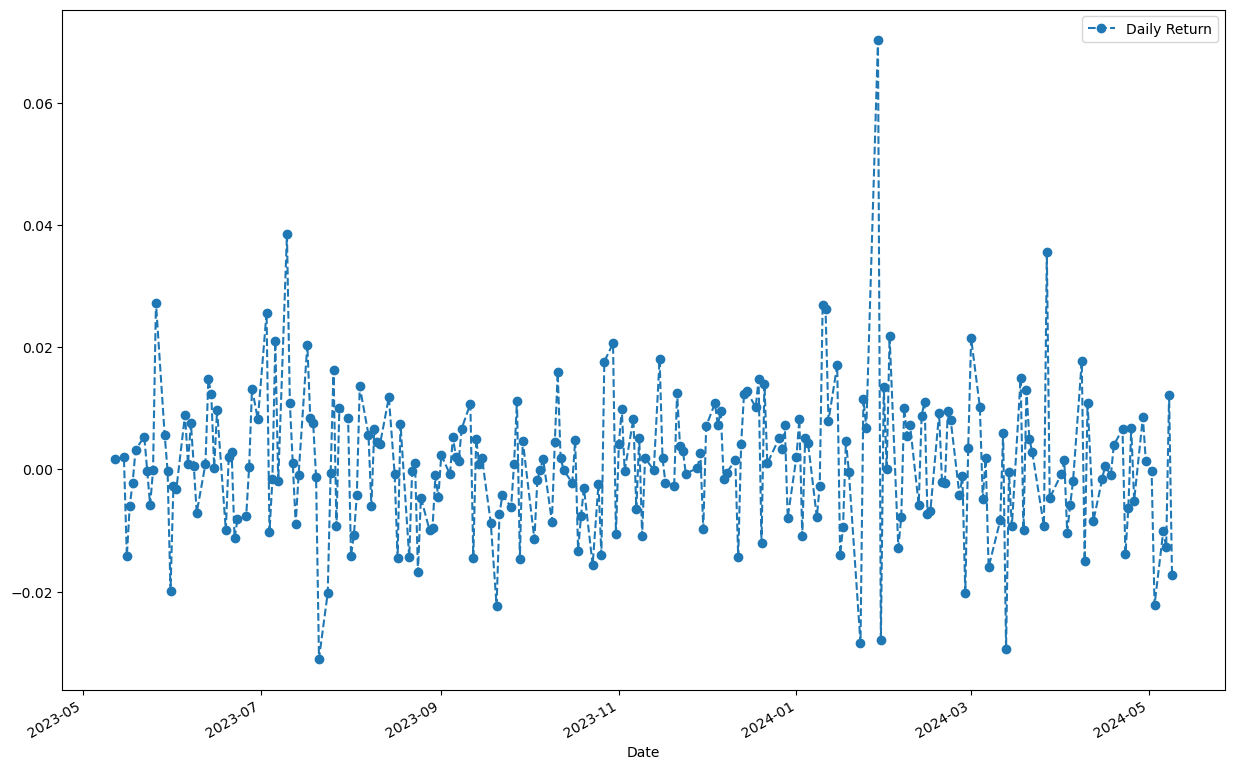

In [20]:
df['Daily Return'] = df['Close'].pct_change()
fig = plt. figure(figsize=(15,10))
df['Daily Return'].plot(legend=True, linestyle='--', marker='o')

In [21]:
close_prices = df['Close']
volatility_std =close_prices.std()
print("Volatility (Standard Deviation):", volatility_std)

Volatility (Standard Deviation): 245.7079000477456


This value represents the average deviation of individual closing prices from their mean value.

In [22]:
daily_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
volatility_hist = daily_returns.std() * 100  # Multiply by 100 to express in percentage
print("Volatility (Historical Volatility):", volatility_hist)

Volatility (Historical Volatility): 1.1724451512172078


In [23]:
import numpy as np
import pandas as pd

# Assume we have historical stock data
historical_data = pd.read_csv('RELIANCE.NS.modified.csv')

# Calculate historical volatility
df['Log_Returns'] = np.log(df['Close'] /df['Close'].shift(1))
historical_volatility =df['Log_Returns'].std() * np.sqrt(252)  # Annualized volatility

# Define a threshold for high volatility
volatility_threshold = 0.2  # 20% annualized volatility

# Function to decide whether to hedge based on volatility
def should_hedge(historical_volatility, volatility_threshold):
    if historical_volatility > volatility_threshold:
        print("Volatility is high. Consider implementing hedging strategies.")
        return True
    else:
        print("Volatility is within acceptable limits. No immediate hedging required.")
        return False
hedge_now = should_hedge(historical_volatility, volatility_threshold)

# If hedging is required, implement a hedging strategy
if hedge_now:
    options_hedge = {
        'type': 'put',  # or 'call' depending on the direction of the hedge
        'strike_price': historical_data['Close'].iloc[-1] * 0.95,  # 5% below the current price
        'expiration_date': '2023-12-31', 
        'quantity': 100  
    }
    print(f"Hedging with options: {options_hedge}")

Volatility is within acceptable limits. No immediate hedging required.


In [24]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'pct_change',
       'hist vol', '40', '252', 'daily_return', 'Daily Return', 'Log_Returns'],
      dtype='object')

In [27]:
df

,Open,High,Low,Close,Adj Close,Volume,pct_change,hist vol,40,252,daily_return,Daily Return,Log_Returns
Date,,,,,,,,,,,,,
2023-05-11,2306.530029,2316.267578,2285.854736,2289.316162,2281.257813,5278930,-0.006529,0.009435243,NaN,NaN,NaN,NaN,NaN
2023-05-12,2279.624512,2295.869385,2267.348633,2293.054199,2284.982666,3477670,0.001633,0.009306484,NaN,NaN,0.163282,0.001633,0.001631
2023-05-15,2298.177002,2311.698730,2282.716553,2297.576904,2289.489502,3416671,0.001972,0.00945005,NaN,NaN,0.197235,0.001972,0.001970
2023-05-16,2301.961182,2307.129883,2261.487549,2264.856689,2256.884277,4358614,-0.014241,0.009441199,NaN,NaN,-1.424118,-0.014241,-0.014344
2023-05-17,2273.348145,2275.194092,2241.966309,2251.473145,2243.547852,4399483,-0.005909,0.009376473,NaN,NaN,-0.590922,-0.005909,-0.005927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-03,2942.000000,2949.899902,2832.300049,2868.000000,2868.000000,8613479,-0.022195,0.012207911,2930.123743,NaN,-2.219498,-0.022195,-0.022445
2024-05-06,2871.000000,2880.000000,2836.000000,2839.050049,2839.050049,3697104,-0.010094,0.01150412,2926.493744,NaN,-1.009413,-0.010094,-0.010145
2024-05-07,2831.949951,2841.500000,2784.000000,2802.949951,2802.949951,7258736,-0.012716,0.013031631,2921.197491,NaN,-1.271556,-0.012716,-0.012797


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'pct_change', 'hist vol']]
y = df['Close'] 

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)


Training set shape (X, y): (196, 8) (196,)
Testing set shape (X, y): (49, 8) (49,)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Reshape the input data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
train_loss_lstm = model_lstm.evaluate(X_train_lstm, y_train, verbose=0)
test_loss_lstm = model_lstm.evaluate(X_test_lstm, y_test, verbose=0)
print(f"LSTM Training Loss: {train_loss_lstm}, LSTM Testing Loss: {test_loss_lstm}")

# Predictions
y_pred_train_lstm = model_lstm.predict(X_train_lstm)
y_pred_test_lstm = model_lstm.predict(X_test_lstm)

# Calculate RMSE
train_rmse_lstm = mean_squared_error(y_train, y_pred_train_lstm, squared=False)
test_rmse_lstm = mean_squared_error(y_test, y_pred_test_lstm, squared=False)
print(f"LSTM Training RMSE: {train_rmse_lstm}, LSTM Testing RMSE: {test_rmse_lstm}")


Epoch 1/50
5/5 [==============================] - 4s 205ms/step - loss: 6671226.5000 - val_loss: 6730877.0000
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 6670917.0000 - val_loss: 6730534.5000
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 6670533.0000 - val_loss: 6730182.5000
Epoch 4/50
5/5 [==============================] - 0s 16ms/step - loss: 6670217.5000 - val_loss: 6729814.5000
Epoch 5/50
5/5 [==============================] - 0s 23ms/step - loss: 6669823.0000 - val_loss: 6729429.0000
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 6669429.5000 - val_loss: 6729016.0000
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 6669032.5000 - val_loss: 6728574.5000
Epoch 8/50
5/5 [==============================] - 0s 22ms/step - loss: 6668557.0000 - val_loss: 6728097.5000
Epoch 9/50
5/5 [==============================] - 0s 22ms/step - loss: 6668094.0000 - val_loss: 6727578.5000
Epoch 10/50
5/5 [=